In [1]:
import os

model_path = os.environ["DATA"] +\
             "/03_paper_popalg/03_CLScore_opt/v2/05.03_pop_457k_CLScore_opt_from_methane/1/pop.csv"

ChEMBL_path = os.environ["DATA"] + "/00_datasets/ChEMBL25/complete_ChEMBL_CLScore.csv"
QMPC9_path = os.environ["DATA"] + "/00_datasets/DFT/cache_OPT_OD9_0.csv"

output_fig_path = os.environ["FIGURES"] + "/03_paper_popalg/03_CLScore_opt/complete_ChEMBL_evomol_CLScore.png"


figsize = (8, 8*2/3)

In [2]:
import csv
import numpy as np

def load_CLScores_from_csv(csv_path, delimiter=","):
    
    CLScores = []
    
    with open(csv_path, "r") as f:
        reader = csv.reader(f, delimiter=delimiter)
        CLScore_idx = None
        for i, row in enumerate(reader):
            
            if i == 0:
                for j, attr in enumerate(row):
                    if attr == "CLScore":
                        CLScore_idx = j
            else:
                CLScores.append(float(row[CLScore_idx]))
    
    CLScores = np.array(CLScores)
    
    # Removing nan values
    CLScores = CLScores[~np.isnan(CLScores)]
    
    print("size : " + str(len(CLScores)))
    return CLScores
            

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
import pandas as pd

def plot_data(model_path, ChEMBL_path, QMPC9_path, path):
    
    plt.figure(figsize=figsize)
    pop_scores = load_CLScores_from_csv(model_path)
    ChEMBL_scores = load_CLScores_from_csv(ChEMBL_path, delimiter=";")
    QMPC9_scores = load_CLScores_from_csv(QMPC9_path, delimiter=",")

#     df = pd.DataFrame(data = np.array([np.concatenate([pop_scores, ChEMBL_scores]),
#                                        np.concatenate([np.full((len(pop_scores),), "EvoMol"),
#                                                        np.full((len(ChEMBL_scores),), "ChEMBL 25")])]).T,
#                       columns=["values", "from"])
    
    bins = np.arange(0, 8, 0.05)
    
#     sns.despine(left=True)
    
    sns.set_palette("colorblind")
    
    sns.distplot(ChEMBL_scores, hist_kws={"label": "ChEMBL 25"}, norm_hist=False, kde=False, hist=True, 
                 bins=bins)
    sns.distplot(pop_scores, hist_kws={"label": "EvoMol dataset"},  norm_hist=False, kde=False, hist=True, 
                 bins=bins)
#     sns.distplot(QMPC9_scores, hist_kws={"label": "QMPC9"},  norm_hist=True, kde=True, hist=True, 
#                  bins=bins)

    plt.xlabel("CLScore")
    
    plt.xlim((0, 7))
    plt.legend()
    plt.tight_layout()
    plt.savefig(path, dpi=300)
    
    
    
    plt.show()

size : 457139
size : 1817766
size : 189446


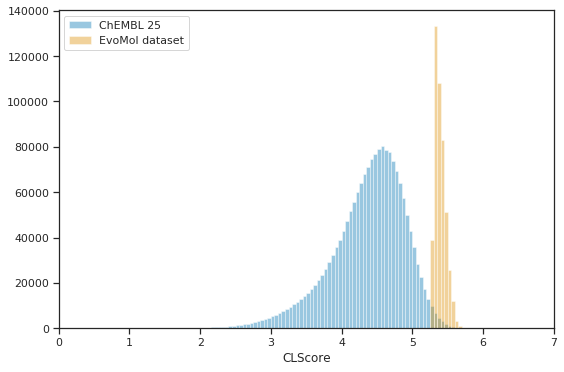

In [4]:
plot_data(model_path, ChEMBL_path, QMPC9_path, output_fig_path)